The purpose of this notebook is to implement the SVM model to predict variety using the iris dataset. Using different kernels, the results (including the decision boundaries) using two features at a time will be plotted.

Note: The code to plot the decision boundaries with different kernels was found in the sci kit learn documentation here:  https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [3]:
#Import data nad print first few lines
iris=pd.read_csv('/Users/danielaquijano/Documents/GitHub/Machine-Learning-Course-Projects/sourcefiles/IRIS.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [10]:
#Train test split data, 60% of data for training, 40% for testing
X=iris.drop('variety',axis=1) #Features, drop the target column since we are trying to predict variety
y=iris['variety'] #value that is to be predicted
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

### SVC with RBF kernel

In [11]:
#Create an instance of the support vector machine model with Support Vector Classifier from sklearn
#Fit the trianing data to model
SVM = SVC()
SVM.fit(X_train,y_train)

SVC()

In [14]:
#Inspect performance of model with sklearn classification report
SVM_predict = SVM.predict(X_test)
print(classification_report(y_test,SVM_predict))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       0.82      1.00      0.90        23
   Virginica       1.00      0.78      0.88        23

    accuracy                           0.92        60
   macro avg       0.94      0.93      0.93        60
weighted avg       0.93      0.92      0.92        60



Above we can see that the model is able to predict the flower variety to 93% Accuracy. 

### SVC with linear kernel

In [20]:
SVM_linear = SVC(kernel='linear')
SVM_linear.fit(X_train,y_train)

SVC(kernel='linear')

In [21]:
SVM_linear_predict = SVM_linear.predict(X_test)
print(classification_report(y_test,SVM_linear_predict))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       1.00      0.96      0.98        23
   Virginica       0.96      1.00      0.98        23

    accuracy                           0.98        60
   macro avg       0.99      0.99      0.99        60
weighted avg       0.98      0.98      0.98        60



SVC with linear model is able to predict variety with 98% accuracy

### SVC with Poly kernel 

In [22]:
SVM_poly=SVC(kernel='poly')
SVM_poly.fit(X_train,y_train)

SVC(kernel='poly')

In [23]:
SVM_poly_predict = SVM_poly.predict(X_test)
print(classification_report(y_test,SVM_poly_predict))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Versicolor       1.00      0.87      0.93        23
   Virginica       0.88      1.00      0.94        23

    accuracy                           0.95        60
   macro avg       0.96      0.96      0.96        60
weighted avg       0.96      0.95      0.95        60



SVC with polynomial kernel is able to predict variety to 96% accuracy.

Plotting results with decision boundaries. Code below taken from scikitlearn documentation: https://scikit-learn.org/0.18/auto_examples/svm/plot_iris.html

Automatically created module for IPython interactive environment


/Users/danielaquijano/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


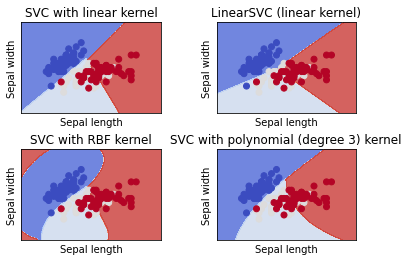

In [19]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = iris.target

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()